**Regression trees**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('yellow_tripdata.csv')
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [ ]:
# VendorID, store_and_fwd_flag, payment_type

array([1, 0])

<Axes: >

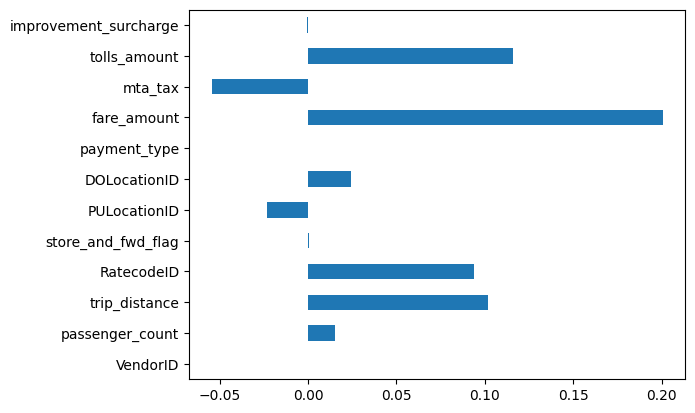

In [19]:
corr_val = df.corr()['tip_amount'].drop('tip_amount')
corr_val.plot(kind='barh')

In [ ]:
df.columns

In [23]:
Y = df[['tip_amount']].astype('float32')

x = df.drop('tip_amount',axis = 1).values

In [ ]:
X = normalize(x, axis =1, norm= 'l1', copy = False)

array([[ 2.  ,  1.  , 17.63, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 19.52, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.81, ...,  0.5 ,  6.94,  1.  ],
       ...,
       [ 2.  ,  1.  , 17.31, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.28, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 16.82, ...,  0.5 ,  6.94,  1.  ]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth = 3 , random_state= 42)

In [44]:
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [45]:
y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squarred error: ", mse)
print("R2 error: ", dt_reg.score(X_test,y_test))

Mean squarred error:  24.219174116022348
R2 error:  0.04118005991497631
